In [2]:
cd ..

/home/janek/reasonable-embeddings


In [3]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [8]:
identity = T.eye(reasoner.not_nn.weight.size(0), device=reasoner.not_nn.weight.device)
W_squared = T.matmul(reasoner.not_nn.weight, reasoner.not_nn.weight)
print( F.mse_loss(W_squared, identity) )

tensor(0.097, grad_fn=<MseLossBackward0>)


In [7]:
T.set_printoptions(precision=3)
print(T.round(T.matmul( reasoner.not_nn.weight, reasoner.not_nn.weight)*100)/100)

tensor([[ 0.190, -0.020, -0.140, -0.100,  0.140,  0.070, -0.040,  0.180, -0.250,
         -0.290],
        [ 0.190,  0.280,  0.040, -0.140,  0.000, -0.060, -0.170,  0.090, -0.240,
         -0.040],
        [-0.180, -0.330,  0.220,  0.120, -0.460,  0.120,  0.080,  0.080, -0.100,
         -0.080],
        [-0.030, -0.080,  0.120,  0.030, -0.040, -0.090,  0.040,  0.040,  0.100,
          0.020],
        [ 0.300, -0.050,  0.060, -0.280,  0.240, -0.390, -0.210, -0.070,  0.090,
          0.030],
        [-0.160, -0.180,  0.100,  0.140,  0.010,  0.070,  0.110, -0.090,  0.190,
          0.020],
        [-0.170, -0.080,  0.220,  0.300, -0.180,  0.260,  0.170,  0.190, -0.110,
         -0.220],
        [ 0.010, -0.060, -0.250,  0.040, -0.040,  0.170, -0.000,  0.150, -0.180,
         -0.090],
        [-0.170, -0.310,  0.430,  0.260, -0.220, -0.050,  0.120,  0.130,  0.170,
         -0.060],
        [ 0.080, -0.020, -0.030, -0.190,  0.270, -0.270, -0.040, -0.260,  0.240,
          0.120]], grad_fn=<

In [10]:
identity = T.eye(trained_reasoner.not_nn.weight.size(0), device=trained_reasoner.not_nn.weight.device)
W_squared = T.matmul(trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)
print( F.mse_loss(W_squared, identity) )

tensor(3.218e-05, grad_fn=<MseLossBackward0>)


In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=25)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/15 | batch 2001/2000 | loss 1.2854 | val loss 1.2959 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 29.99s
train epoch 01/15 | batch 2001/2000 | loss 0.9402 | val loss 0.7209 | acc 0.8007 | f1 0.1227 | prec 0.9911 | recall 0.0654 | roc auc 0.5601 | pr auc 0.3780 | elapsed 91.32s
train epoch 02/15 | batch 2001/2000 | loss 0.6112 | val loss 0.5319 | acc 0.8218 | f1 0.3075 | prec 0.8953 | recall 0.1856 | roc auc 0.7059 | pr auc 0.5160 | elapsed 77.40s
train epoch 03/15 | batch 2001/2000 | loss 0.4680 | val loss 0.4334 | acc 0.8401 | f1 0.4719 | prec 0.7971 | recall 0.3352 | roc auc 0.7960 | pr auc 0.6337 | elapsed 73.98s
train epoch 04/15 | batch 2001/2000 | loss 0.3634 | val loss 0.3540 | acc 0.8691 | f1 0.6076 | prec 0.8409 | recall 0.4757 | roc auc 0.8541 | pr auc 0.7412 | elapsed 89.31s
train epoch 05/15 | batch 2001/2000 | loss 0.2820 |

In [11]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)
print(F.mse_loss(input, output))

tensor([0.292, 0.461, 0.642, 0.352, 0.550, 0.328, 0.195, 0.055, 0.291, 0.024])
tensor([0.291, 0.449, 0.641, 0.367, 0.537, 0.330, 0.206, 0.055, 0.308, 0.027],
       grad_fn=<SqueezeBackward3>)
tensor(9.710e-05, grad_fn=<MseLossBackward0>)


In [12]:
print(input)
output = reasoner.not_nn(reasoner.not_nn(input))
print(output)
print(F.mse_loss(input, output))

tensor([0.292, 0.461, 0.642, 0.352, 0.550, 0.328, 0.195, 0.055, 0.291, 0.024])
tensor([ 0.236,  0.361, -0.249,  0.358, -0.332,  0.172,  0.068,  0.223,  0.089,
        -0.493], grad_fn=<AddBackward0>)
tensor(0.196, grad_fn=<MseLossBackward0>)


In [5]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-4.2116e-01,  2.1319e-01,  4.6395e-01, -1.5702e-01,  7.4209e-02,
         -2.4013e-01,  2.4302e-01,  4.3010e-01,  2.1282e-01,  1.7317e-01],
        [ 3.0832e-01, -3.5545e-01,  3.8858e-02,  1.1046e-02,  3.1371e-01,
          4.3426e-01,  3.8179e-01,  1.7662e-01,  4.7103e-01, -2.5577e-01],
        [ 5.7027e-01,  4.2137e-02, -1.6256e-03,  1.4822e-01, -1.6466e-02,
         -5.6056e-01, -3.0909e-01,  1.6385e-01,  2.4328e-01, -3.5716e-01],
        [-1.2038e-01, -5.9409e-04,  1.9719e-01, -4.5909e-01,  3.3890e-01,
         -3.2854e-01,  5.7814e-02, -5.1570e-01, -5.5376e-02, -5.1685e-01],
        [ 6.4671e-02,  3.2901e-01, -8.0593e-02,  3.1293e-01, -1.4292e-01,
         -1.8615e-01,  5.2528e-01, -4.9019e-01,  3.8043e-01,  3.7184e-01],
        [-3.0785e-01,  4.4695e-01, -6.6535e-01, -2.6008e-01, -1.6088e-01,
          1.4402e-01, -1.0701e-01,  1.3153e-01,  3.2641e-01, -2.6147e-01],
        [ 2.5377e-01,  3.6688e-01, -3.1962e-01,  1.7286e-01,  4.2130e-01,
         -

In [6]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*100)/100)

tensor([[ 1.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.0000],
        [-0.0000,  1.0000, -0.0100, -0.0000,  0.0000, -0.0100,  0.0000,  0.0100,
          0.0100, -0.0100],
        [ 0.0000,  0.0000,  1.0000, -0.0000, -0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0200,  1.0100, -0.0000,  0.0100,  0.0000, -0.0000,
         -0.0100,  0.0100],
        [ 0.0000, -0.0000, -0.0200, -0.0000,  1.0000, -0.0100,  0.0000,  0.0000,
          0.0100, -0.0100],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.0000,  1.0000,  0.0000, -0.0000,
         -0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0100,  0.0000, -0.0000,  0.0100,  1.0100, -0.0000,
         -0.0100,  0.0000],
        [ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.0000,
         -0.0000,  0.0000],
        [-0.0000,  0.0000,  0.0200,  0.0100,  0.0000,  0.0200,  0.0000, -0.0000,
          0.9900,  0.0100],
        [ 0.0000, -

In [7]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    else:
        train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.2206 | val loss 1.2206 | acc 0.6431 | f1 0.3934 | prec 0.3120 | recall 0.5324 | roc auc 0.6481 | pr auc 0.4857 | elapsed 21.45s
train epoch 01/10 | batch 1251/1250 | loss 1.0251 | val loss 0.8012 | acc 0.7330 | f1 0.4749 | prec 0.4148 | recall 0.5554 | roc auc 0.7320 | pr auc 0.5625 | elapsed 44.30s
train epoch 02/10 | batch 1251/1250 | loss 0.6779 | val loss 0.5283 | acc 0.8074 | f1 0.5758 | prec 0.5523 | recall 0.6013 | roc auc 0.8147 | pr auc 0.6658 | elapsed 44.07s
train epoch 03/10 | batch 1251/1250 | loss 0.4604 | val loss 0.3670 | acc 0.8636 | f1 0.6780 | prec 0.6961 | recall 0.6608 | roc auc 0.8789 | pr auc 0.7680 | elapsed 44.97s
train epoch 04/10 | batch 1251/1250 | loss 0.3325 | val loss 0.2735 | acc 0.8999 | f1 0.7572 | prec 0.8011 | recall 0.7179 | roc auc 0.9204 | pr auc 0.8437 | elapsed 44.43s
train epoch 05/10 | batch 1251/1250 | loss 0.2572 | val loss 0.2176 | acc 0.9227 | f1 0.8106 | prec 0.8678 | recall 0.

In [8]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240625T192945


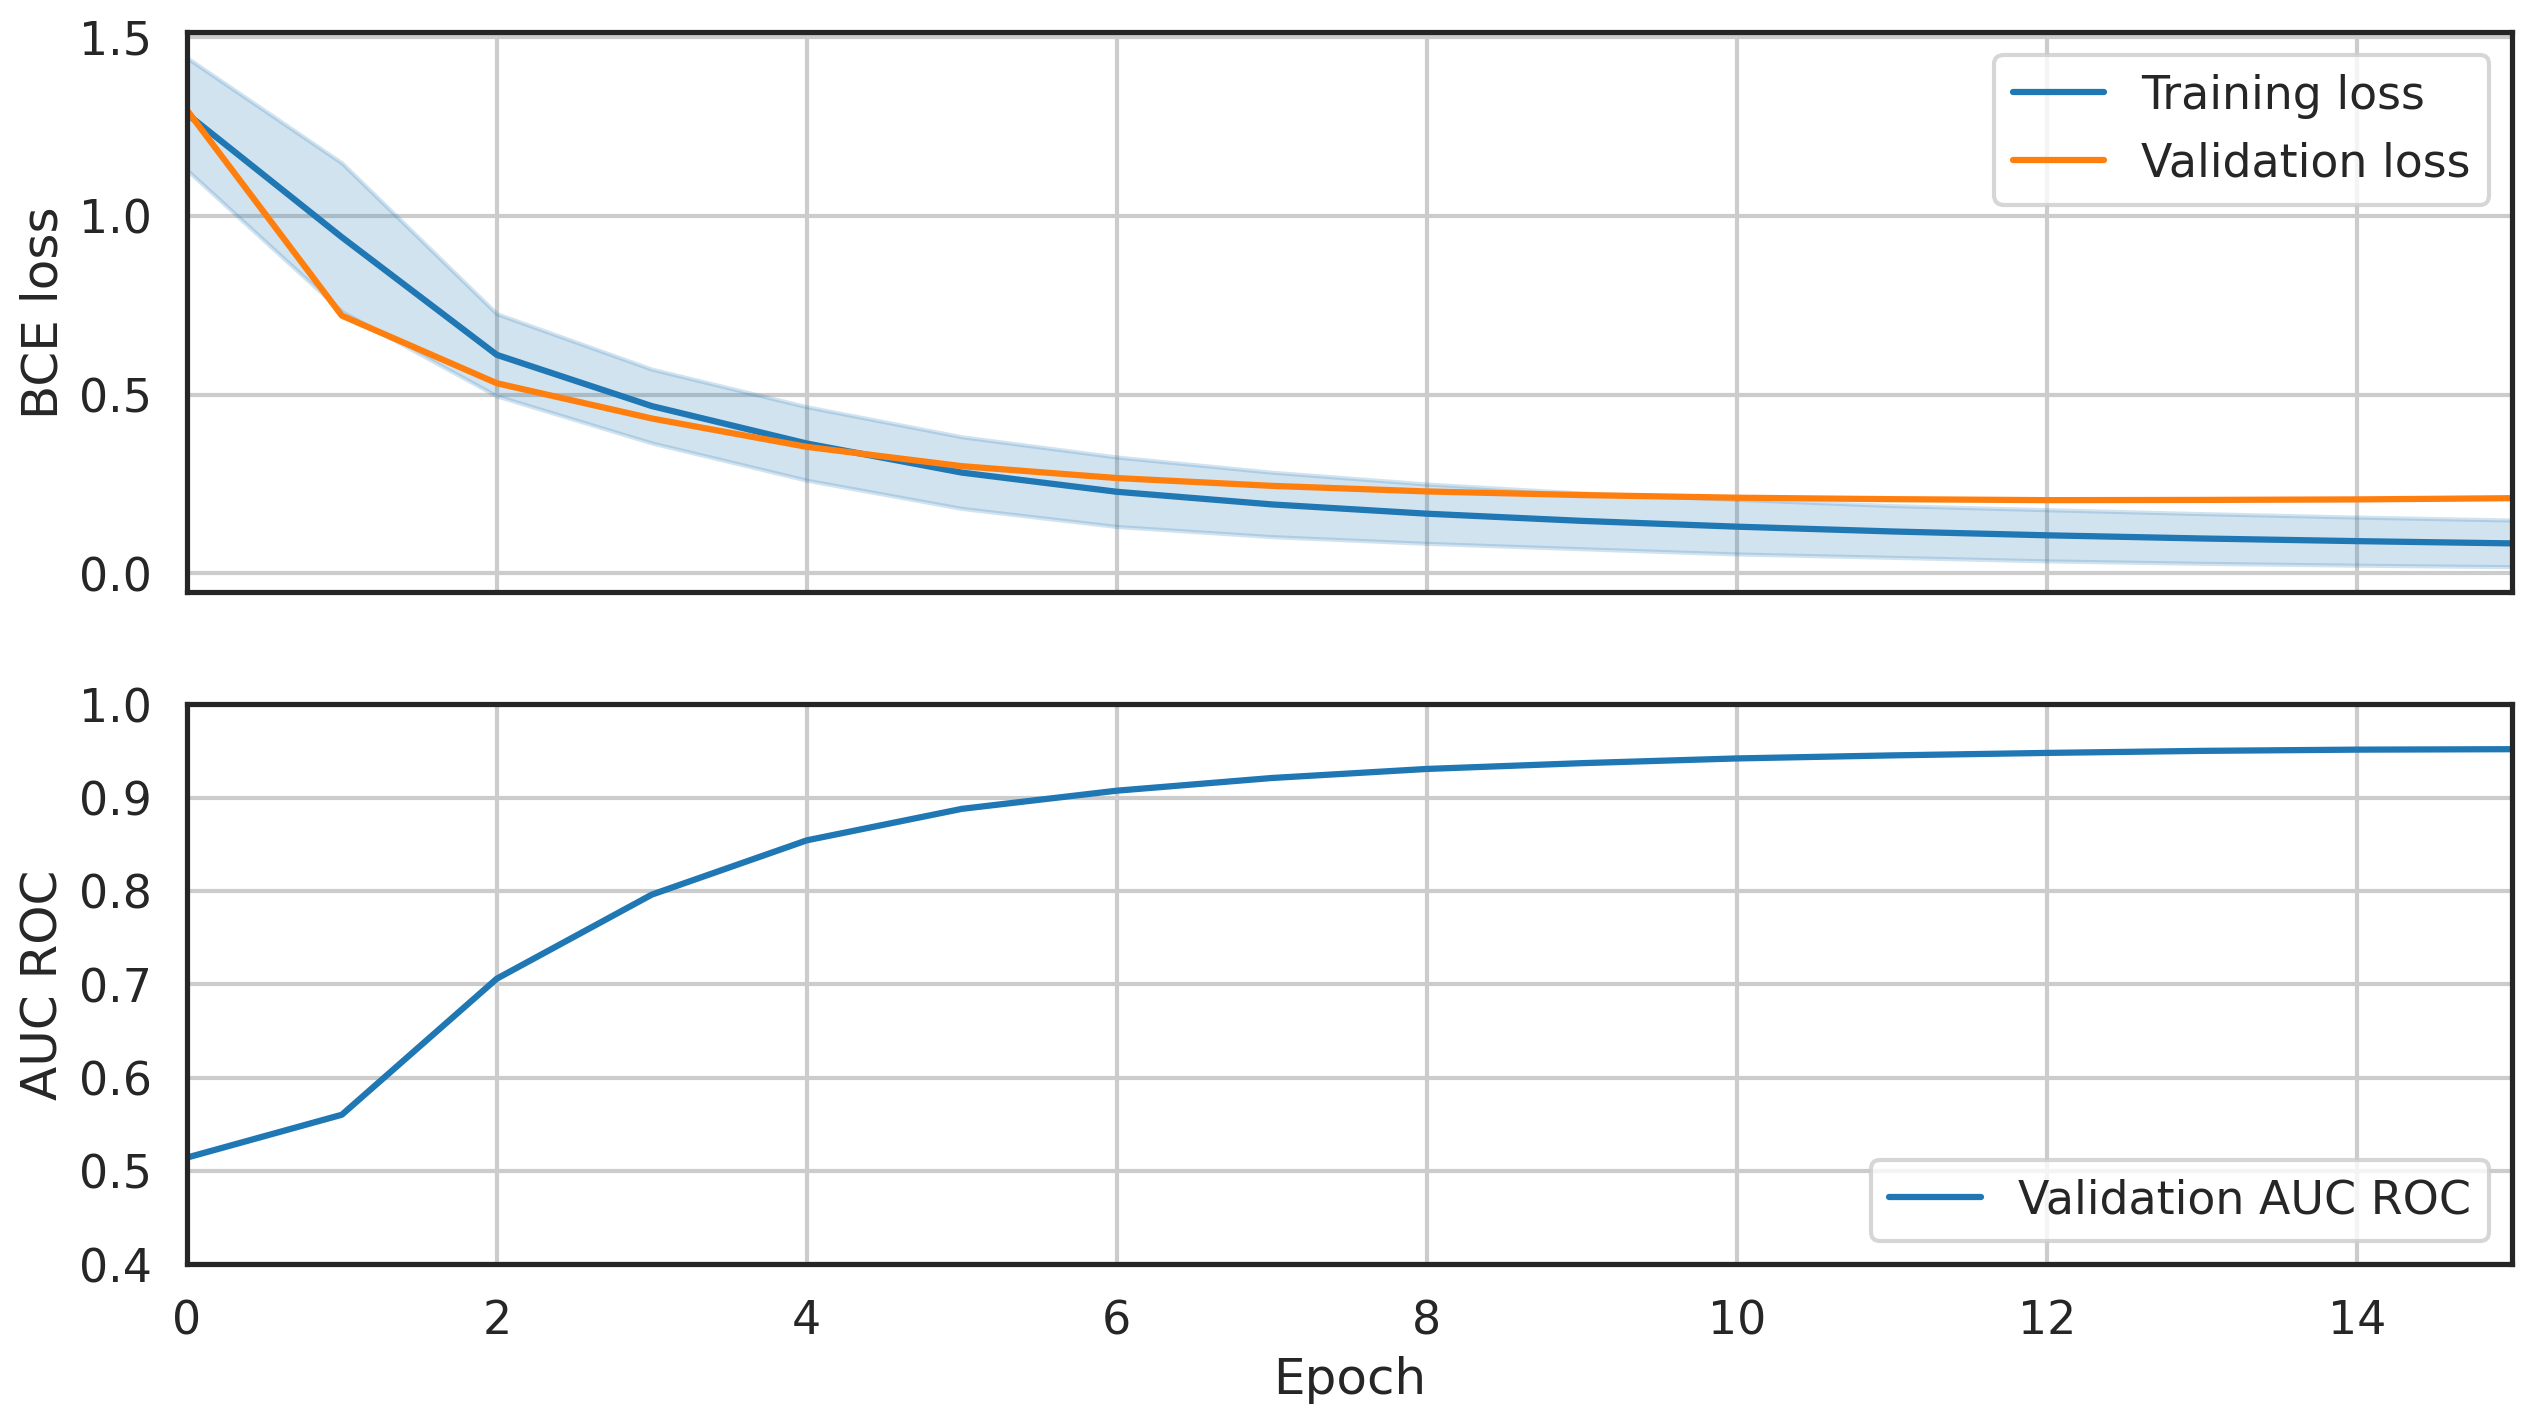

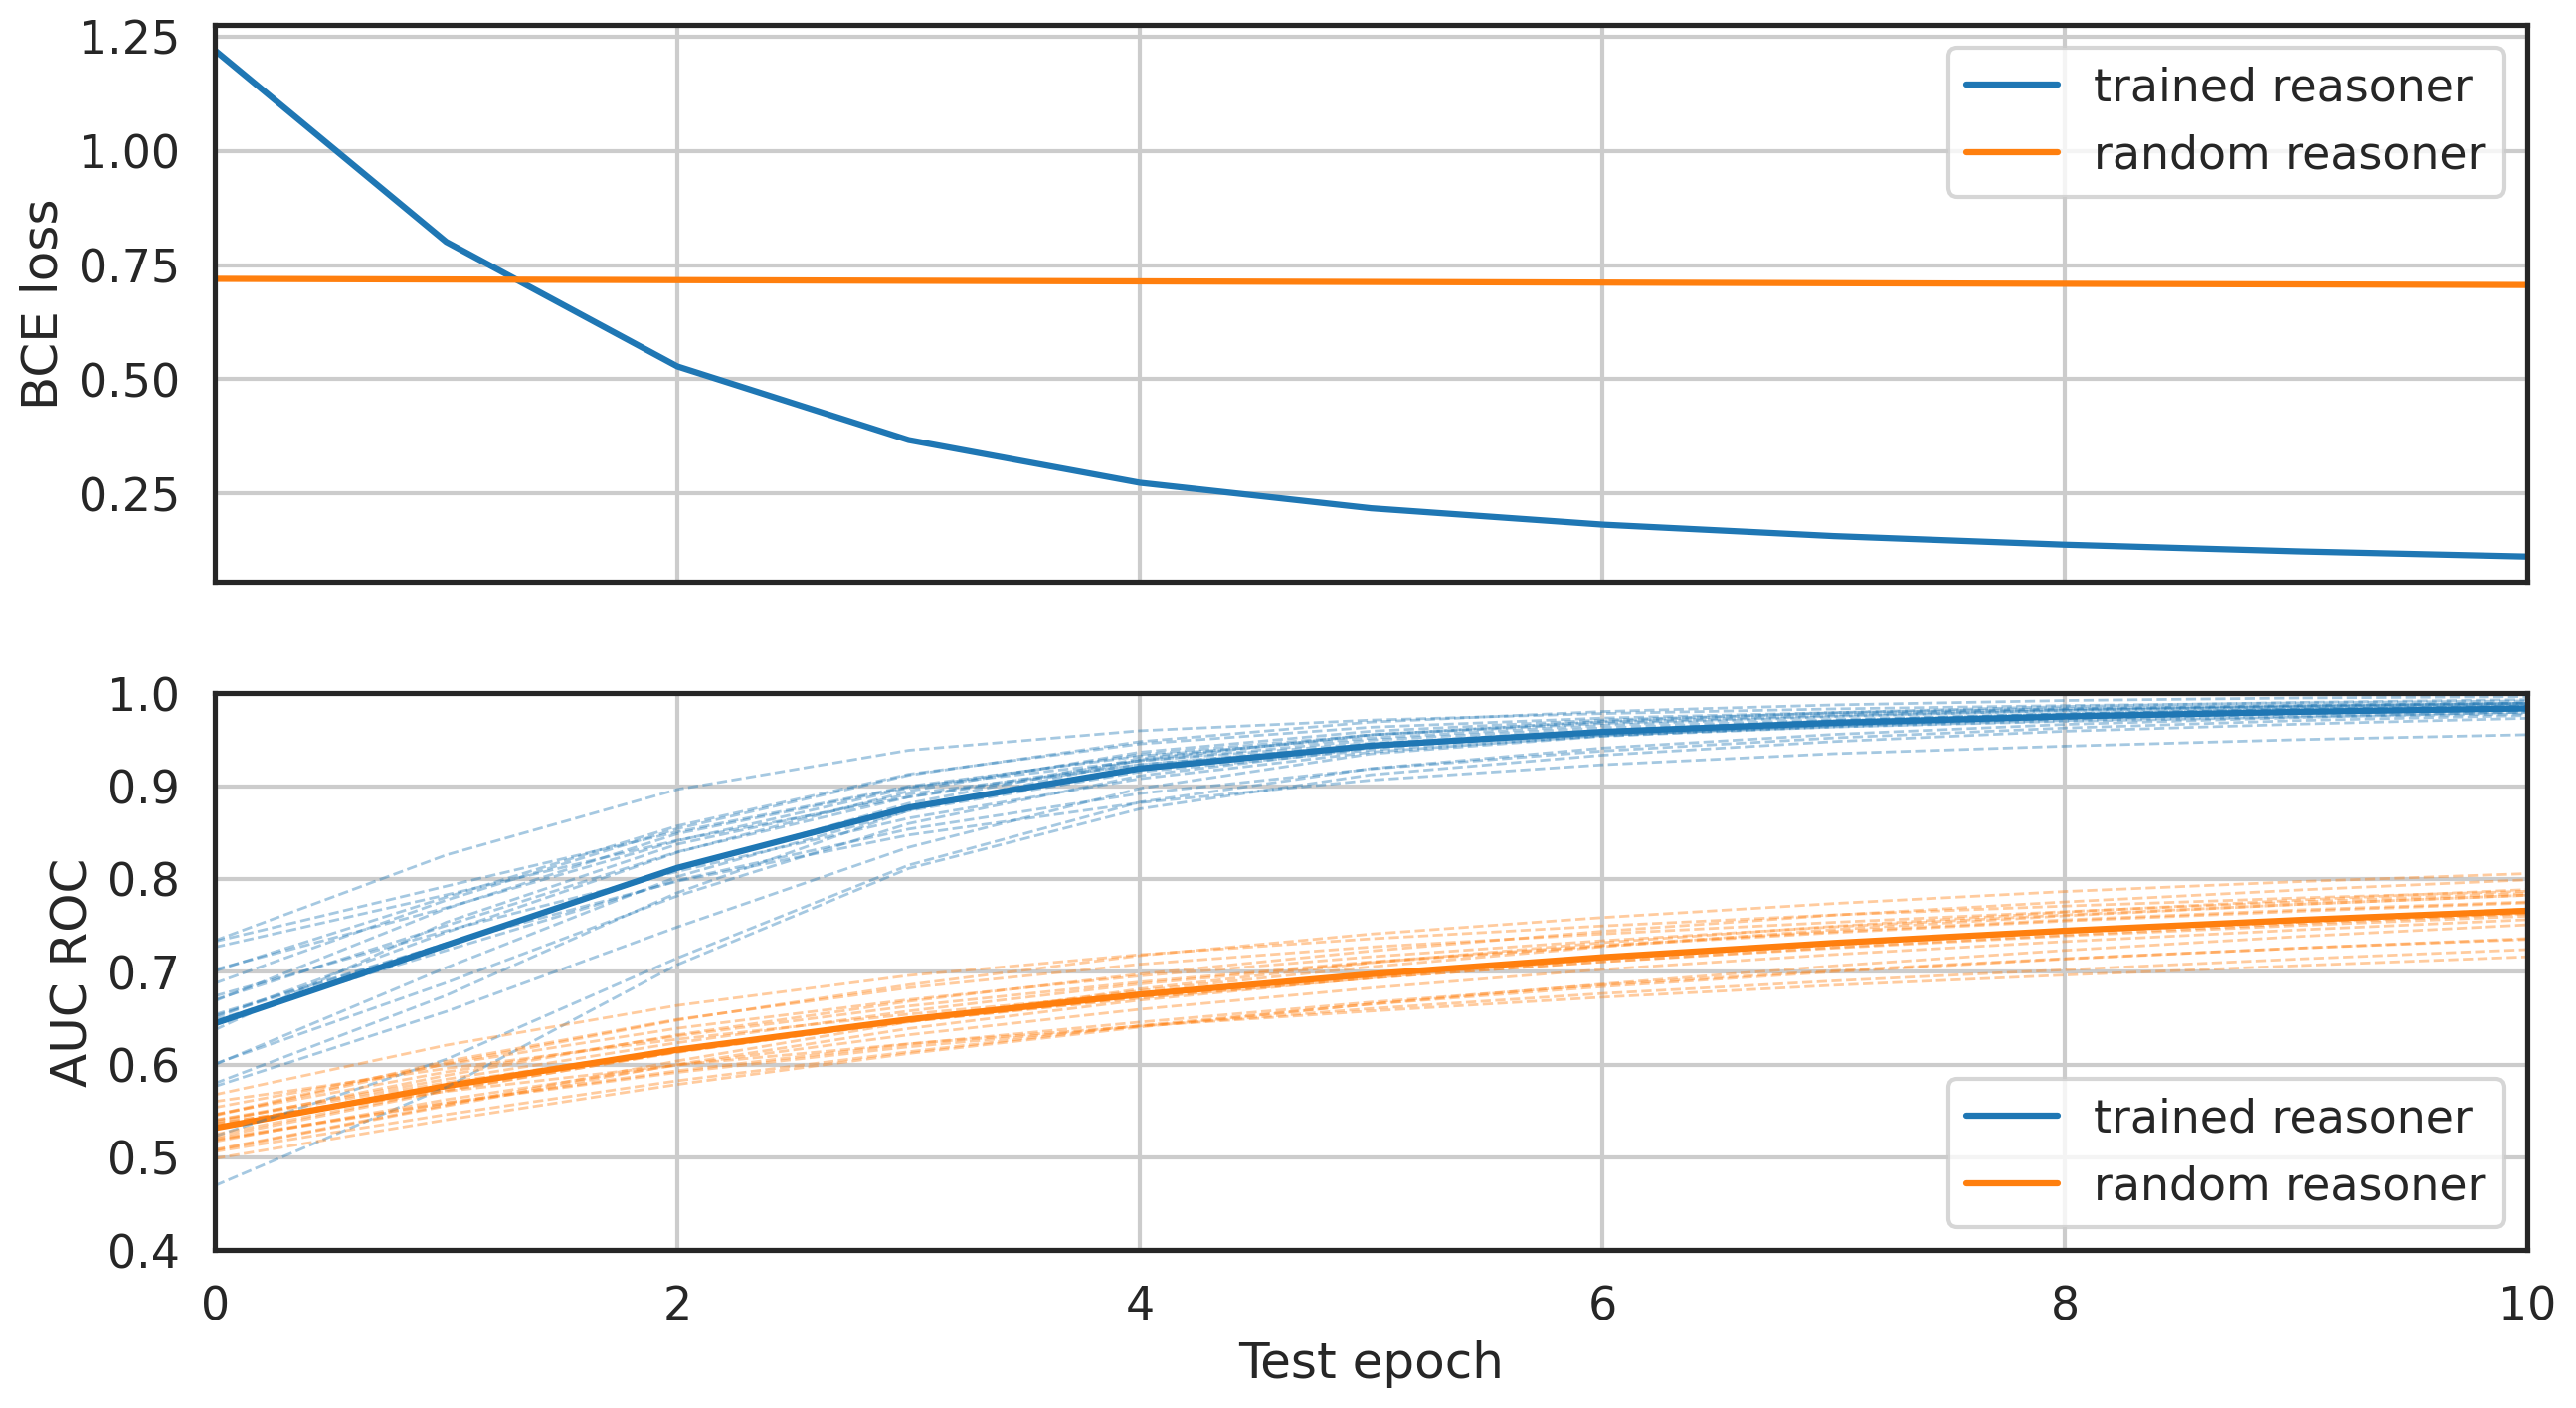

             mean       std     micro
acc      0.961725  0.016216  0.961725
prec     0.958387  0.029667  0.958531
recall   0.859584  0.049030  0.861201
f1       0.905986  0.038672  0.907263
auc_roc  0.983611  0.008971  0.984627
auc_pr   0.963196  0.018517  0.965650
             mean       std     micro
acc      0.287375  0.027590  0.287375
prec     0.231894  0.030550  0.232159
recall   0.987012  0.012017  0.987236
f1       0.374628  0.039972  0.375917
auc_roc  0.765613  0.024266  0.766383
auc_pr   0.558881  0.052247  0.563443


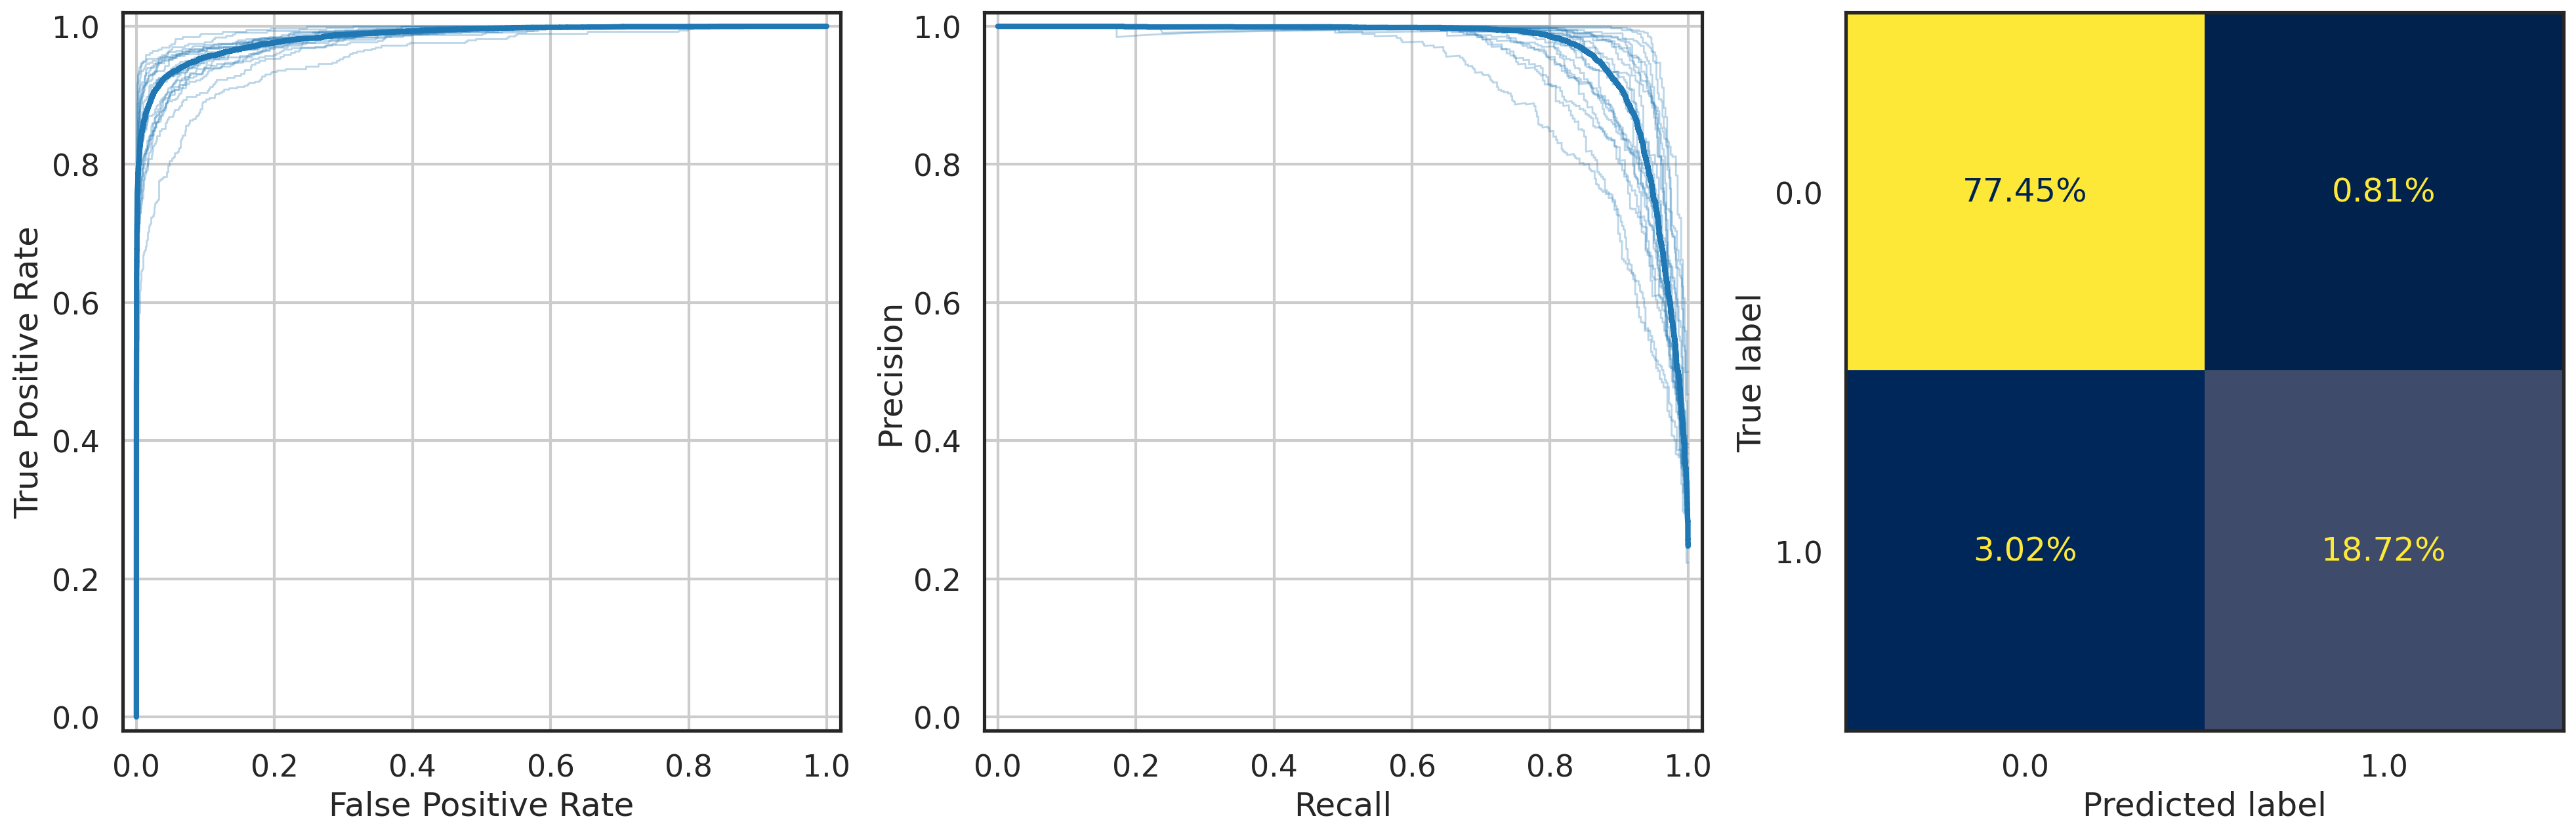

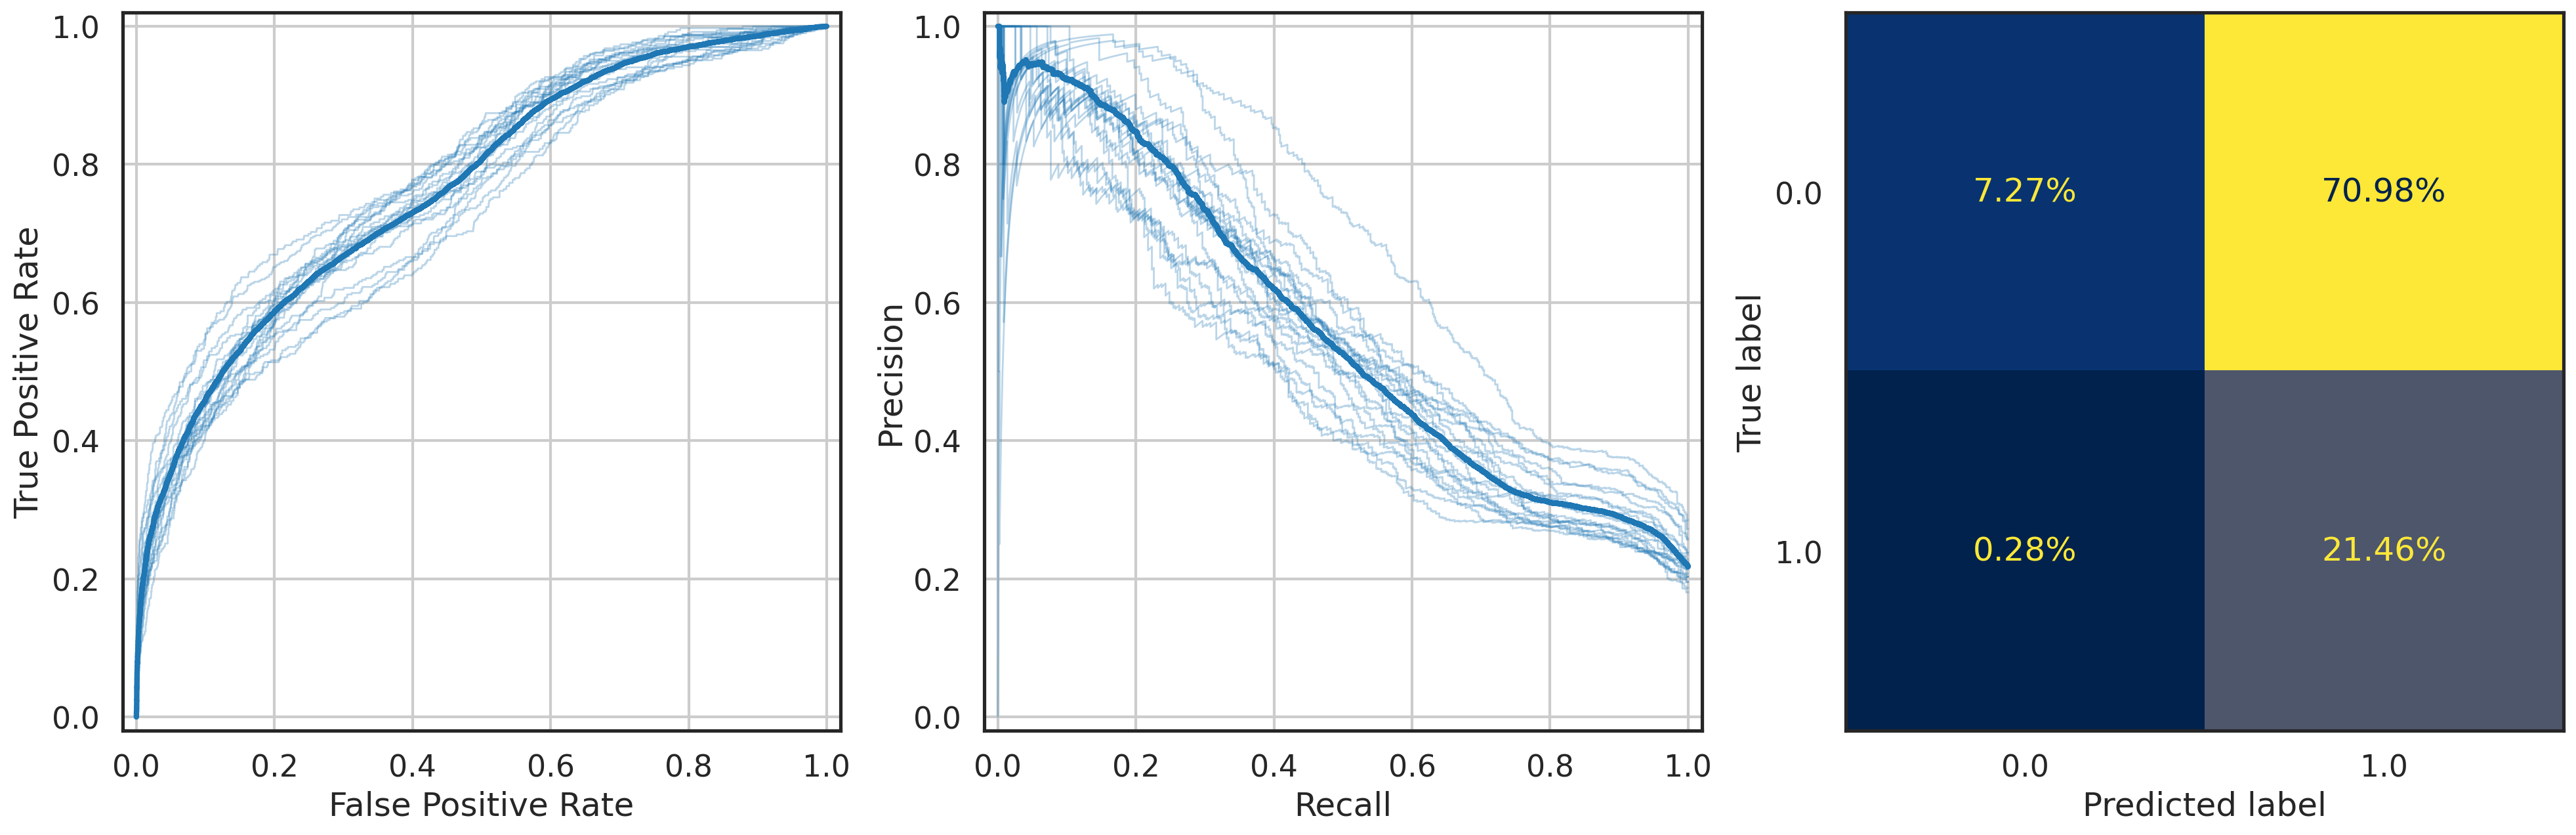

In [9]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))